In [28]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [29]:
#Retrieving data: the data was separately retrieved using API, and presented in a CSV file.
# Read the CSV file into a DataFrame
London_df = pd.read_csv('London_weather.csv')

# Display the first few rows of the DataFrame
print(df.head())

   Temperature (°C)  Humidity (%)  Wind Speed (m/s)  Pressure (hPa)  \
0            269.35          92.0              1.69          1038.0   
1            268.91          92.0              1.74          1038.0   
2            268.49          92.0              1.93          1038.0   
3            268.17          92.0              1.97          1038.0   
4            268.13          93.0              1.86          1038.0   

  Weather Description  
0        sky is clear  
1        sky is clear  
2        sky is clear  
3        sky is clear  
4        sky is clear  


Preprocessing the dataset

In [30]:
#Checking for missing data values
missing_data = London_df.isnull().sum()

# Print the missing data count for each column
print("Missing Data in Each Column:")
print(missing_data)

Missing Data in Each Column:
dt                         0
Date                       1
timezone                   1
city_name                  1
lat                        1
lon                        1
temp                       1
visibility             17798
dew_point                  1
feels_like                 1
temp_min                   1
temp_max                   1
pressure                   1
sea_level              50517
grnd_level             50517
humidity                   1
wind_speed                 1
wind_deg                   1
wind_gust              49841
rain_1h                43402
rain_3h                50517
snow_1h                50390
snow_3h                50517
clouds_all                 1
weather_id                 1
weather_main               1
weather_description        1
weather_icon               1
dtype: int64


In [31]:
df_filled = London_df.fillna(method='ffill')

# Check again if there are any remaining missing values
missing_data_after_fill = df_filled.isnull().sum()

print("Missing Data After Forward Fill:")
print(missing_data_after_fill)

Missing Data After Forward Fill:
dt                         0
Date                       0
timezone                   0
city_name                  0
lat                        0
lon                        0
temp                       0
visibility                 7
dew_point                  0
feels_like                 0
temp_min                   0
temp_max                   0
pressure                   0
sea_level              50517
grnd_level             50517
humidity                   0
wind_speed                 0
wind_deg                   0
wind_gust                399
rain_1h                  115
rain_3h                50517
snow_1h                 8420
snow_3h                50517
clouds_all                 0
weather_id                 0
weather_main               0
weather_description        0
weather_icon               0
dtype: int64


<ipython-input-31-5840e48415c0>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filled = London_df.fillna(method='ffill')


In [32]:
#General edits to the dataframe, focusing on the columns needed, and creating appropiate names for the columns.
df_filled = df_filled.rename(columns={
    'temp': 'Temperature (°C)',
    'humidity': 'Humidity (%)',
    'wind_speed': 'Wind Speed (m/s)',
    'pressure': 'Pressure (hPa)',
    'weather_description': 'Weather Description'
})

# Display the updated DataFrame
print(df_filled.head())

           dt                           Date  timezone city_name        lat  \
0  1009843200  2002-01-01 00:00:00 +0000 UTC       0.0    London  51.507218   
1  1009846800  2002-01-01 01:00:00 +0000 UTC       0.0    London  51.507218   
2  1009850400  2002-01-01 02:00:00 +0000 UTC       0.0    London  51.507218   
3  1009854000  2002-01-01 03:00:00 +0000 UTC       0.0    London  51.507218   
4  1009857600  2002-01-01 04:00:00 +0000 UTC       0.0    London  51.507218   

        lon  Temperature (°C)  visibility  dew_point  feels_like  ...  \
0 -0.127586            269.35         NaN     268.37      266.74  ...   
1 -0.127586            268.91         NaN     267.93      266.15  ...   
2 -0.127586            268.49         NaN     267.52      265.37  ...   
3 -0.127586            268.17         NaN     267.20      264.94  ...   
4 -0.127586            268.13         NaN     267.28      265.06  ...   

   wind_gust  rain_1h  rain_3h  snow_1h  snow_3h  clouds_all  weather_id  \
0        N

In [50]:
#Create a new dataset with the columns needed.
Weather_london = df_filled[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Pressure (hPa)', 'Weather Description']]

# Display the selected DataFrame
print(Weather_london.head())

Weather_london.to_csv('updated_weather_data.csv', index=False)

# Confirm the columns saved
print("New columns")

   Temperature (°C)  Humidity (%)  Wind Speed (m/s)  Pressure (hPa)  \
0            269.35          92.0              1.69          1038.0   
1            268.91          92.0              1.74          1038.0   
2            268.49          92.0              1.93          1038.0   
3            268.17          92.0              1.97          1038.0   
4            268.13          93.0              1.86          1038.0   

  Weather Description  
0        sky is clear  
1        sky is clear  
2        sky is clear  
3        sky is clear  
4        sky is clear  
New columns


In [51]:
#Basic description.
print(Weather_london.describe())

       Temperature (°C)  Humidity (%)  Wind Speed (m/s)  Pressure (hPa)
count      50517.000000  50517.000000      50517.000000    50517.000000
mean         284.374479     75.601758          4.069298     1015.533682
std            5.918641     15.828101          2.089582       10.192381
min          268.130000     16.000000          0.000000      969.000000
25%          280.140000     65.000000          2.600000     1009.000000
50%          284.260000     80.000000          3.940000     1016.000000
75%          288.550000     88.000000          5.100000     1022.000000
max          306.650000    100.000000         28.800000     1045.000000


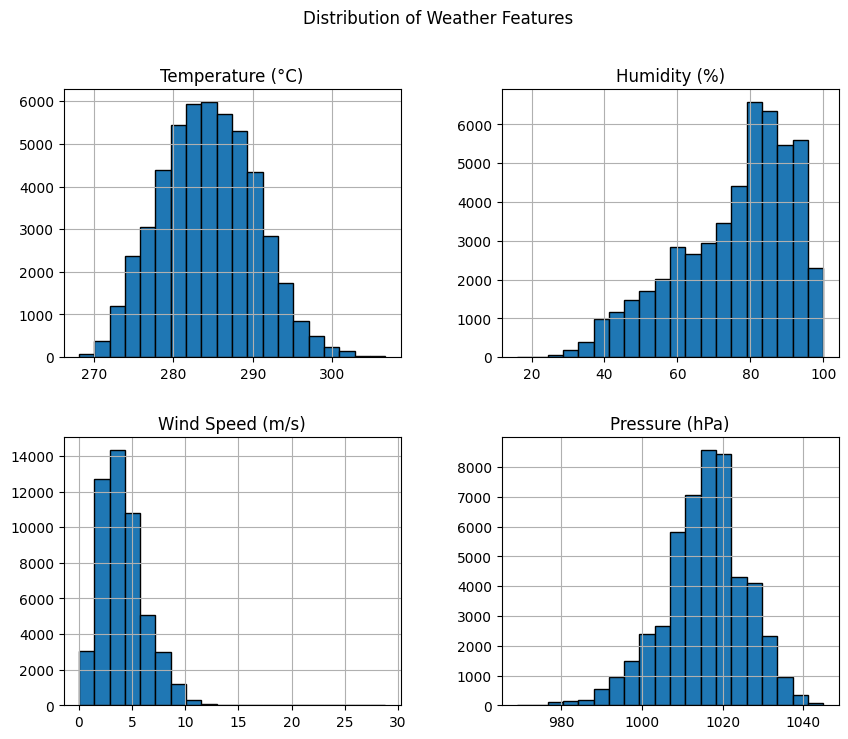

In [52]:
Weather_london[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Pressure (hPa)']].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Weather Features')
plt.show()

Review of **Histograms:**



---






*   The **temperature feature** displays a bell-shaped distribution with majority of the values clustered around 275 and 295. This demonstrates a typica range in temperatures with rare cases of extremely high or low temperatures.

*   The **humidity feature** displays a right-skewed distribution, with the highest concentrations seen around 80-100%. This demonstrates that the data selection predominately contains high humidity levels, whilst lower ones are less common for this city.

*   The **wind feature** displys few instances of high wind speed, with a sharp peak seen between 206 m/s, indicating mild wind speed as a whole.



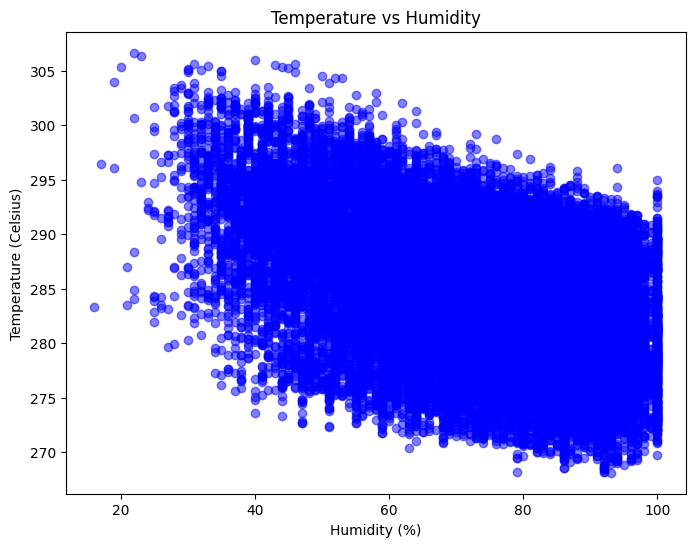

In [55]:
#Comparing different variables: Temperature vs Humidity.
plt.figure(figsize=(8, 6))
plt.scatter(Weather_london['Humidity (%)'], df['Temperature (°C)'], color='blue', alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Temperature (Celsius)')
plt.show()

Review of **Temperature vs Humidity:**



---






*   The graph indicates a clear **negative correlation** between temperature vs humidity. So as the humidity increases, the temperature generally decreases. This is to be expected.

*   The graph also indicates **a range in humidity levels at lower temperatures**. At lower temperatures (between 270-285), the humidity rates varies between 20%-100%, this indicates colder weather can occur in both dry and humid conditions.




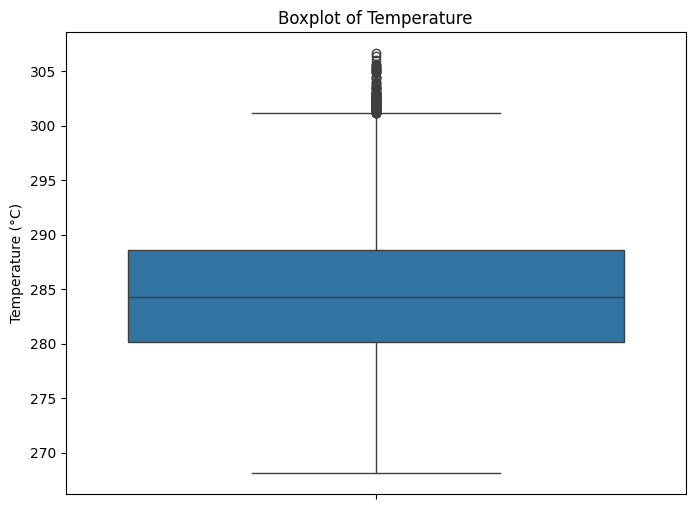

In [57]:
# Boxplot to detect outliers in temperature
plt.figure(figsize=(8, 6))
sns.boxplot(df['Temperature (°C)'])
plt.title('Boxplot of Temperature')
plt.show()

Review of **Temperature vs Humidity:**



---






*   Majority of the **temperature readings** are within the range of 280°C to 290°C.

*   The **central temperature** is around 285°C.



*   **Several outliers** can be see above the 300 mark, indicating higher temperature values compared to the rest of the data.



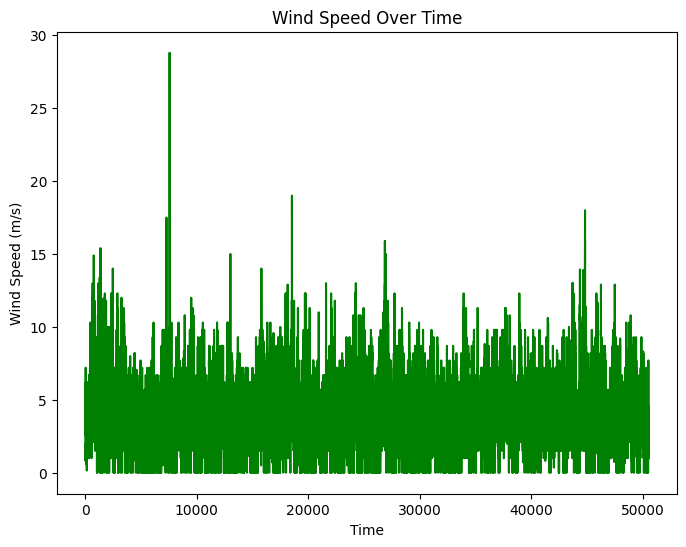

In [60]:
#Wind speed over time
plt.figure(figsize=(8, 6))
plt.plot(df['Wind Speed (m/s)'], label='Wind Speed (m/s)', color='green')
plt.title('Wind Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.show()

Review of **Temperature vs Humidity:**



---






*   Majority of wind speed rates are **low/moderate.** Whilst high peaks are rarely seen. These peaks may represent weather events such as Storms, or just general high wind condition.

*   The wind spped is**generally consistent** across the years, they simply remain stable with occasions of spikes.


# Sampled data set

In [59]:
#To provide a clearer view of the analysis, a random sample of data for generated for analysis.
London_sample = Weather_london.sample(n=1000, random_state=42)

# Basic analysis on the sampled data
print(London_sample.describe())

       Temperature (°C)  Humidity (%)  Wind Speed (m/s)  Pressure (hPa)
count       1000.000000    1000.00000        1000.00000     1000.000000
mean         284.810300      74.74500           4.13331     1015.409000
std            6.098318      16.42089           2.17719       10.195767
min          269.150000      25.00000           0.00000      973.000000
25%          280.390000      63.00000           2.60000     1010.000000
50%          285.010000      79.00000           4.10000     1017.000000
75%          289.060000      88.00000           5.10000     1022.000000
max          302.960000     100.00000          15.40000     1043.000000


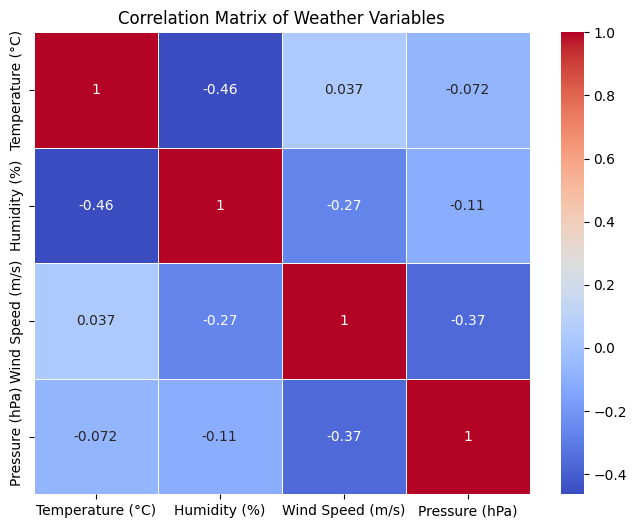

In [62]:
#Referring to all numeric variables.
df_numeric = London_sample[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (m/s)', 'Pressure (hPa)']]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

Review of **Correlation matrix**



---






*   There is a **moderate negative correlation** seen between the temperature and humidity, which matches the results seen in the previous graph.

*   There is also a **moderate negative correlation** seen between wind speed and pressure, implying higher wind speeds with lower atmospheric pressure.

* The correlation noted **between temperature and pressure is very weak**, indicating no significant impact. Changes in temperature do not provide a significant impact on the pressure, or changes in pressure does not provide significant impact on temperature.


# Modelling and predictions

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [65]:
# Features (X) and target (y)
X = London_sample[['Humidity (%)', 'Wind Speed (m/s)', 'Pressure (hPa)']]  # Features
y = London_sample['Temperature (°C)']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# eEvaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

#Predictions made by model.
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

Mean Squared Error: 28.929255887447347
R-Squared: 0.2526277975291027
       Actual   Predicted
40728  292.91  290.691865
42489  290.06  282.708822
28995  278.57  281.890122
49155  288.66  282.228947
7200   280.75  289.961973


Evaluation of results:


---



*   The **mean squared error is 28.93.** This indicates frequent errors in the models ability to predict temperature.

*   Additionally, when comparing the actual and predicted temperatures, the model utimately **underestimates the higher temperature values**. For instance, actual temperatures of 292.91°C and 290.06°C are predicted to be 290.69°C and 282.71°C respectively. This suggests that the model might be biased toward predicting lower temperature values and struggles with more extreme temperatures.


A non-linear model may not be appropiate for this.

In [67]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model and make predictions
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance
print(f"Random Forest R-Squared: {r2_score(y_test, y_pred_rf)}")

Random Forest R-Squared: 0.17772097179085422


Evaluation of results:


---



*   The random forest model did worse than the linear regression. As such, may not be suited for this dataset. Alternatively, the selection of features used may not be significnat enough to explain the temperature variation effectively.


In [70]:
# Wind Speed
London_sample['Wind Chill'] = 13.12 + 0.6215 * London_sample['Temperature (°C)'] - 11.37 * (London_sample['Wind Speed (m/s)'] ** 0.16)


X = London_sample[['Humidity (%)', 'Wind Speed (m/s)', 'Pressure (hPa)', 'Wind Chill']]

In [71]:
# Create an interaction term between Humidity and Pressure
London_sample['Humidity_Pressure_Interaction'] = London_sample['Humidity (%)'] * London_sample['Pressure (hPa)']

# Add the interaction term to the feature set
X = London_sample[['Humidity (%)', 'Wind Speed (m/s)', 'Pressure (hPa)', 'Humidity_Pressure_Interaction', 'Wind Chill']]

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialising the model
rf = RandomForestRegressor(random_state=42)

# Tune hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Predict using the best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the performance of the tuned model
print(f"Tuned Random Forest R-Squared: {r2_score(y_test, y_pred_best_rf)}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest R-Squared: 0.2978344550553236


Original Random Forest R-Squared: 0.17772097179085422
Tuned Random Forest R-Squared: 0.2978344550553236


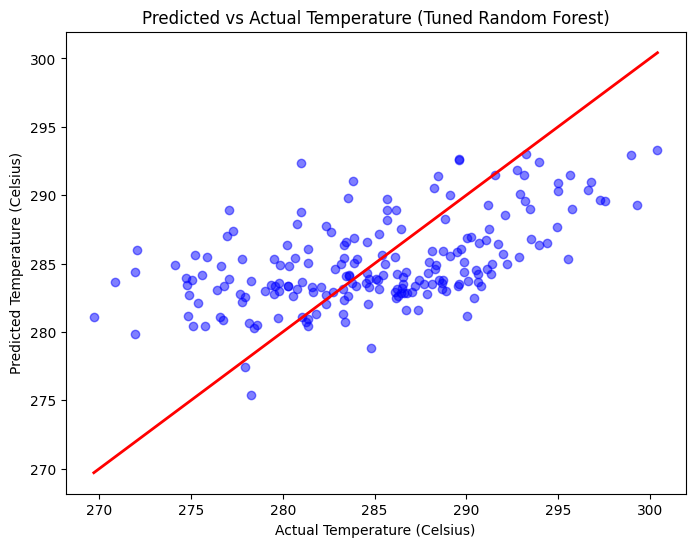

In [73]:
# Evaluate original vs tuned Random Forest
print(f"Original Random Forest R-Squared: {r2_score(y_test, y_pred_rf)}")
print(f"Tuned Random Forest R-Squared: {r2_score(y_test, y_pred_best_rf)}")

# Visualize predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Predicted vs Actual Temperature (Tuned Random Forest)')
plt.xlabel('Actual Temperature (Celsius)')
plt.ylabel('Predicted Temperature (Celsius)')
plt.show()

Evaluation of results:


---



*   The graph can be assumed to be moderate positive in correlation, however there is a clear spread in the values, indicating the model does not predict temperatures as well. Although, the predictions are generally close to actual.

*   As seen in previous models, the model tends to underestimate high temperatures, and predicts a lower temperatures. Therefore, struggling ot predict higher temperatures, this may be a result of the rare peaks with higher temperatures seen in the dataset.


* The best predictions for the model were seen in the range around 280-290°C.

Conclusion

---



---



*   Based on the models tested, the models generally provide moderate performance in predicting the temperature. The R squared values were relatively low, indicating a lack in the capture of temperature variance, based on the features used. To combat this, alternative features can be used, or a more complex model.

*   In all models, an underestimation of higher temperatures was noted, suggesting the potential need for additional features to provide better predictions.

In future, to improve accuracy the following can be done.

- **Use additional features:** particularly to captures regions of extreme weather conditions.
- **Using non-linear models**
- **Potential need for better data cleaning.




Evaluation of process:

---



---



I initially wanted to retrieve the google reviews for a company in the area, analyse this data, and generate insights towards the areas that the company could expand on to improve their overall service. However, using the Google places API only allows you to receive 5 reviews. Alternatively ways of retrieving these reviews are unethical. So, I decided to create an analyse of the weather data available on the openweather API.

Another issue I had was working with the larger dataset, I initially gathered data from 01.01.2002 to 01.01.2024. Whilst, it was fine, the graphs and associated analysis was sparse, and hard to review. So i decided to do a smaller time frame.

There was alot of data to work with, as such i did limited analysi with the time frame.